# Logistic Regression Exercise

You will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an advertisement on a company website. You will create a model to predict whether or not a user will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad


## Import Libraries

**Import a libraries you think you will need (or just import them as you go along)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv('https://raw.githubusercontent.com/wintonw/ISE364/master/Logistic_Reg/advertising.csv')

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Use seaborn to explore the data.  
Create the plots shown below

**Create a histogram of the Age**

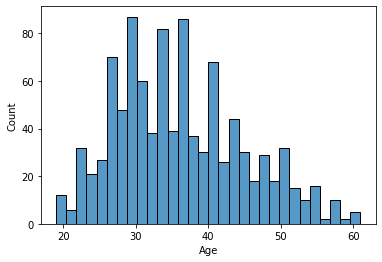

In [11]:
sns.histplot(ad_data['Age'], bins=30)

**Create a jointplot showing Area Income versus Age.**

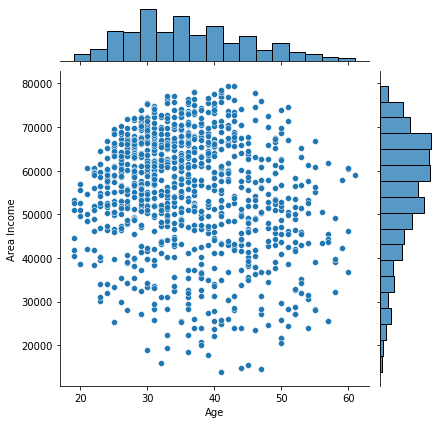

In [13]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**  
Note: Since you are doing a joint kdeplot, you can pass keyword arguments from seaborn.kdeplot

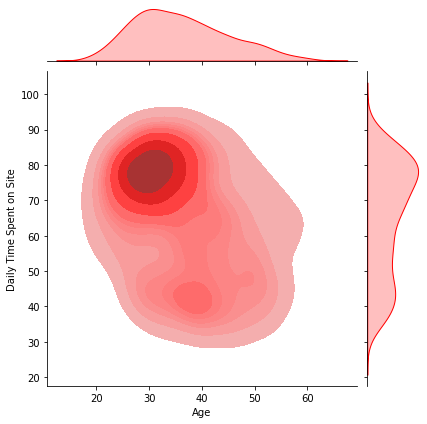

In [26]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', fill=True, color='red')

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

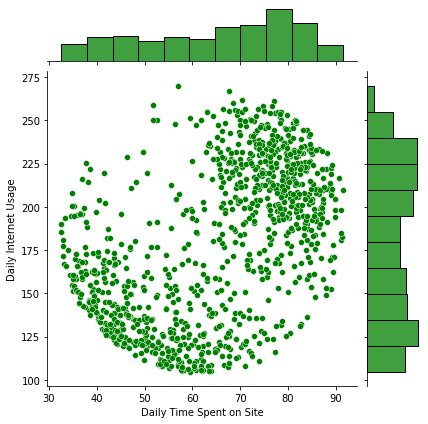

In [25]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

**Create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

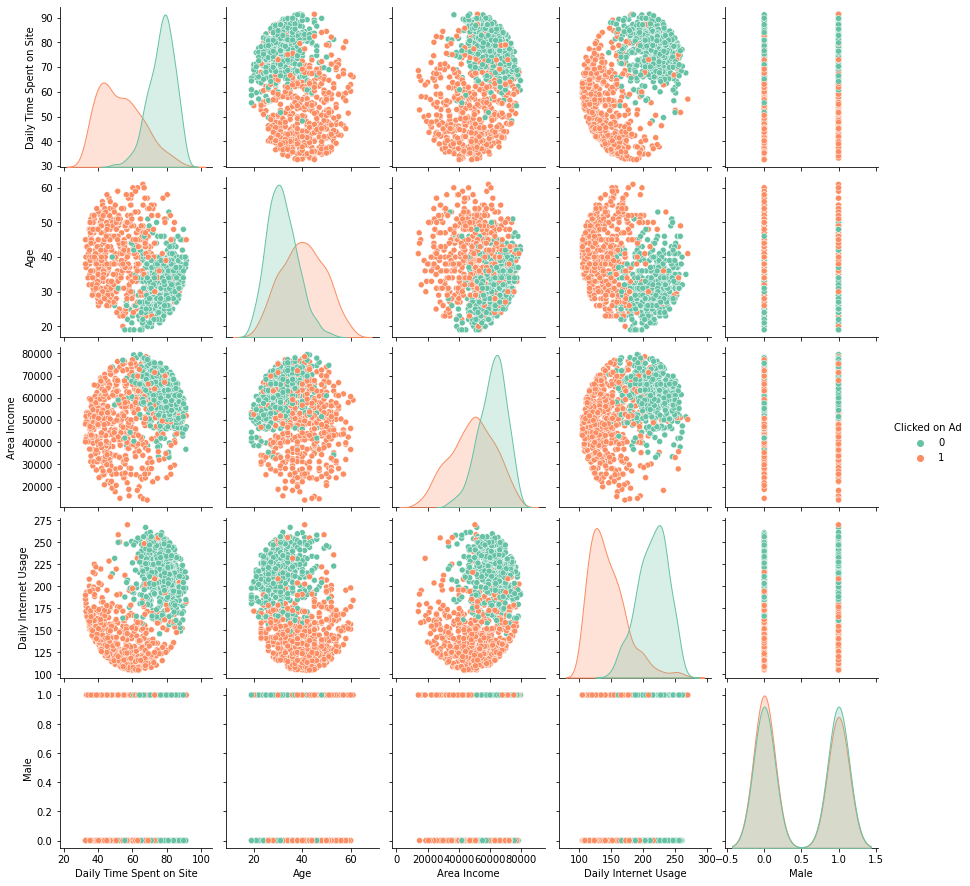

In [30]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', palette='Set2')

# Logistic Regression

Create, train and test a model  
You have the freedom here to choose the columns that you want to train on.
Experiment to find the what you condsider the best model.

In [34]:
ad_data.isna().describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [39]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [40]:
X = ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
y = ad_data['Clicked on Ad']

**Notes**
- There are no missing data
- Idealy it is better to be able to use Categorical Data such as ` 'Ad Topic Line', 'City', Country', 'Timestamp'`, but not sure how to do that, and they are dropped

**Split the data into training set and testing set using train_test_split**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lrmodel = LogisticRegression(solver = 'liblinear')

In [47]:
lrmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
**Predict values for the testing data.**

In [49]:
predictions = lrmodel.predict(X_test)

**Create a confusion_matrix for the model.**  
Note: Your results will depend on factors chosen and random number seeds

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test, predictions)

array([[152,   5],
       [  9, 134]])

**Create a classification report for the model.**

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.96      0.94      0.95       143

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

